# Resolução de Sistemas via operadores lineares #

**Objetivo**: Dado o seguinte problema de valores de contorno:

$$y''+5y'+6y=0$$
$$y(0)=0\hspace{0.1cm},\hspace{0.1cm}y(2)=0.2$$

Deseja-se resolve-lo, separando a EDO em um sistema de EDO's de primeira ordem e aplicando o método de operadores lineares.

**Solução**: Primeiramente, deve-se desmembrar a EDO em um sistema de EDO's de primeira ordem. Para isso, faça $f = y$ e $g = y'$. Com isso:

\begin{equation} \nonumber
\begin{cases}

\Large \frac{df}{dt} = \normalsize g(t) \\ \\
\Large \frac{dg}{dt} = \normalsize -5g(t) - 6f(t) \\ \\
f(0) = 0\hspace{0.1cm},\hspace{0.1cm}f(2) = 0.2

\end{cases}
\end{equation}

## Construindo os operadores lineares ##

Da segunda equação do sistema, obtemos que:

$$\frac{dg}{dt}+5g = -6f$$

Na linguagem de operadores:

$$D_{x}^{g}\cdot[g] + 5[g] \approx -6[f]$$
$$\left(D_{x}^{g} + 5I\right)[g] \approx -6[f]$$
$$[ L^{g} ] \cdot [g] \approx -6[f]$$

Dessa forma, o sistema matricial fica:

\begin{equation} \nonumber
\begin{cases}

D_{x}^{f}\cdot [ f ] \approx [ g ] \\
[ L^{g} ] \cdot [ g ] \approx -6[ f ]

\end{cases}
\end{equation}

Multiplicando a primeira equação por $[L^{g}]$, encontramos:

$$[L^{g}]\cdot D_{x}^{f}\cdot [f] \approx [L^{g}]\cdot[g]$$
$$[L^{g}] \cdot D_{x}^{f} \cdot [f] + 6[f] \approx [0]$$
$$\left([L^{g}]\cdot D_{x}^{f} + 6I\right)\cdot[f]\approx[0]$$
$$[L^{f}]\cdot[f]\approx[0]$$

## Código: ##

Número de pontos: N = 101
Passo: ∆ = 0.02


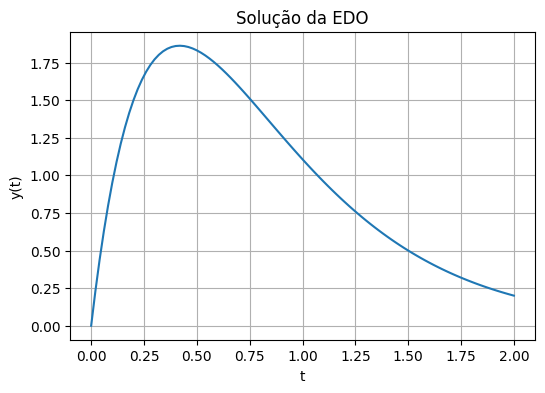

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.sparse as sp

t0 = 0
tN = 2
N = int(input('Informe o número de pontos: '))
Delta = (tN - t0) / (N-1)

# Criando as matrizes de diferenciação:

def Dxf(N):
    D = -sp.eye(N) + sp.eye(N,k=1)
    return D / Delta

def Dxg(N):
    D = sp.eye(N) - sp.eye(N,k=-1)
    return D / Delta

# Construindo os operadores Lineares:

Lg = Dxg(N) + 5 * sp.eye(N)
Lf = Lg.dot(Dxf(N)) + 6*sp.eye(N)

# Resolvendo o problema:

# 1°) Criando a matriz nula e ajustando seus valores

M = np.zeros(N)
M[0] = 0; M[-1] = 0.2

# Ajustando as linhas de Lf:

Lf = Lf.tolil() #Convertendo de csr para um formato mais sucetível a mudanças
Lf[0,:] = 0; Lf[0,0] = 1
Lf[-1,:] = 0; Lf[-1,-1] = 1
Lf = Lf.tocsr() #Voltando ao formato csr, que é mais eficiente para operações matriciais

# Resolvendo o sistema:

f = sp.linalg.spsolve(Lf, M) #Quando se usa spsolve, a matriz A é uma matriz scipy, e B uma matriz numpy

# Criando o gráfico da solução

T = np.linspace(t0,tN,N)
plt.figure(figsize=(6,4))
plt.plot(T,f)
plt.grid(True)
plt.title('Solução da EDO')
plt.xlabel('t')
plt.ylabel('y(t)')
print(f'Número de pontos: N = {N}\nPasso: \u2206 = {Delta}')
plt.show()
